# Notebook to plot training progress of agent

It will obtain data from file stored in format like `bullet_racecar.cma.1.32.hist.json` and `.hist_best.json`, where format is `env_name.optimizer.num_rollouts.popsize.hist.json`.


In [1]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt

In [2]:
env_name = 'doomrnn'
optimizer = 'cma'
num_rollouts = 16 # number of rollouts that are averaged over an episode
popsize = 64

In [8]:
file_base = env_name+'.'+optimizer+'.'+str(num_rollouts)+'.'+str(popsize)
filename = os.path.join('log', file_base+'.hist.json')
with open(filename, 'r') as f:
  raw_data = json.load(f)
  
print("Raw data:", raw_data)

# Convert the simple format to the expected structured format
structured_data = []
for i, reward in enumerate(raw_data):
    # Create a structured entry with:
    # [generation, time_stamp, mean_reward, min_reward, max_reward]
    # For simplicity, using the index as time and generation
    # and using the reward value for mean/min/max
    structured_data.append([float(i), float(i*60), float(reward), float(reward), float(reward)])
    
data = np.array(structured_data)
print("Structured data shape:", data.shape)

Raw data: [-500, -400, -300, -200, -100]
Structured data shape: (5, 5)


In [14]:
file_base = env_name+'.'+optimizer+'.'+str(num_rollouts)+'.'+str(popsize)
filename = os.path.join('log', file_base+'.hist_best.json')
with open(filename, 'r') as f:
  raw_data = json.load(f)
  
print("Raw best data:", raw_data)

# Convert the simple format to the expected structured format
structured_best_data = []
for i, reward in enumerate(raw_data):
    # Create a structured entry with:
    # [generation, time_stamp, best_reward, extra_info]
    # For simplicity, using the index as time and generation
    structured_best_data.append([float(i), float(i*60), float(reward), 0.0])
    
best_data = np.array(structured_best_data)
print("Structured best data shape:", best_data.shape)

Raw best data: [-500, -400, -300, -200, -100]
Structured best data shape: (5, 4)


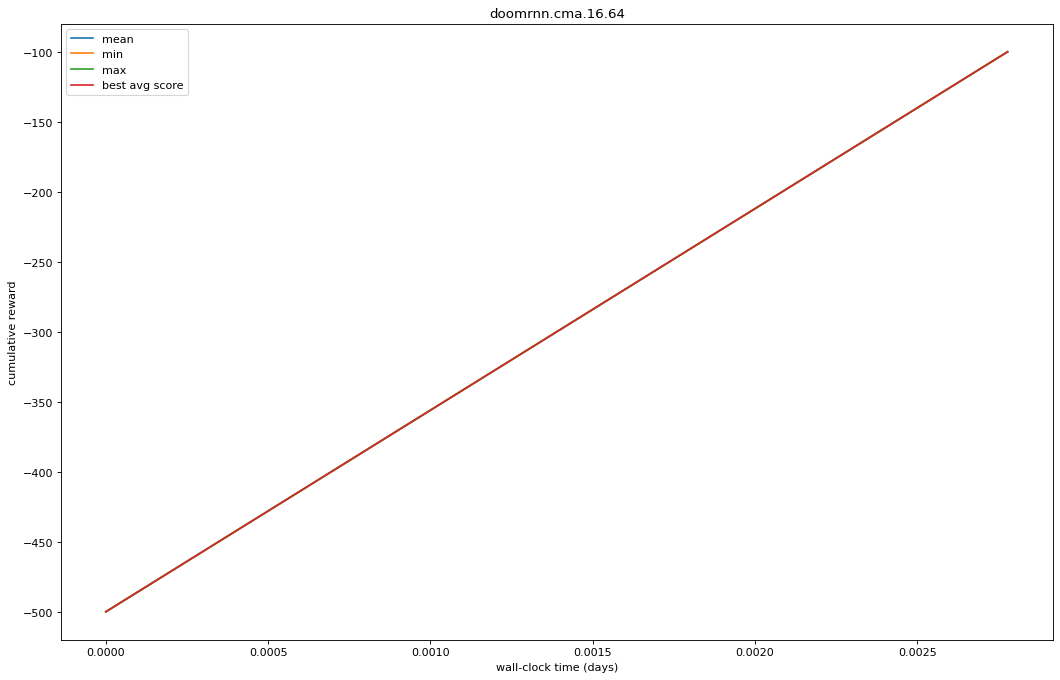

In [10]:
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
line_mean, = plt.plot(data[:, 1]/(60*24*60), data[:, 2])
line_min, = plt.plot(data[:, 1]/(60*24*60), data[:, 3])
line_max, = plt.plot(data[:, 1]/(60*24*60), data[:, 4])
line_best, = plt.plot(best_data[:, 1]/(60*24*60), best_data[:, 2])
plt.legend([line_mean, line_min, line_max, line_best], ['mean', 'min', 'max', 'best avg score'])
plt.xlabel('wall-clock time (days)')
plt.ylabel('cumulative reward')
plt.title(file_base)
plt.savefig(file_base+".wall.svg")
plt.show()

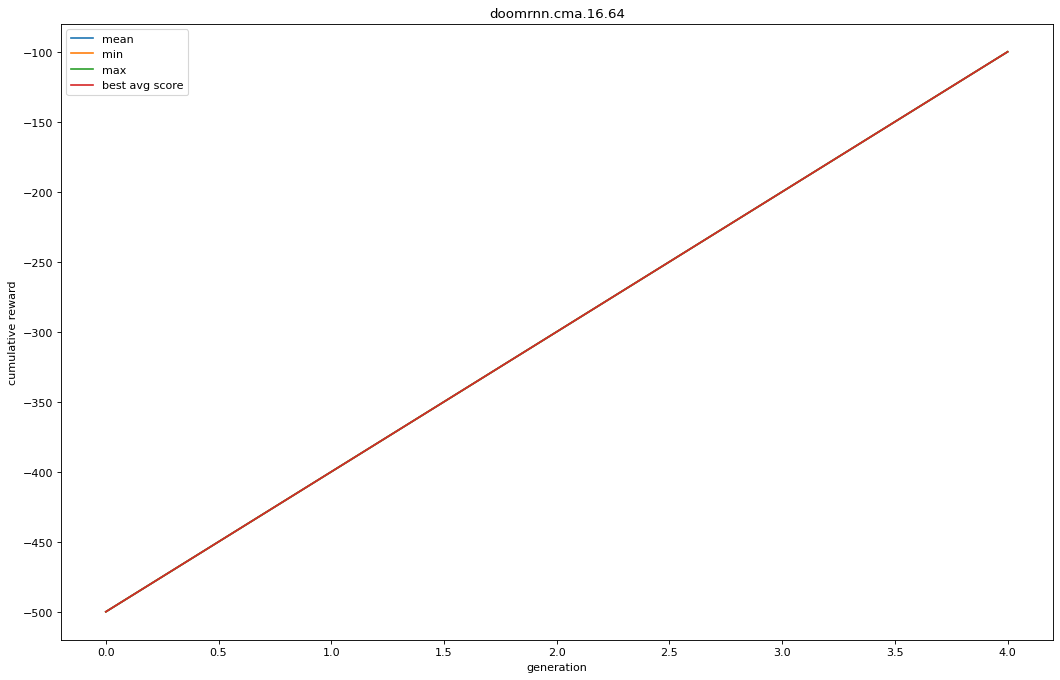

In [15]:
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
line_mean, = plt.plot(data[:, 0], data[:, 2])
line_min, = plt.plot(data[:, 0], data[:, 3])
line_max, = plt.plot(data[:, 0], data[:, 4])
line_best, = plt.plot(best_data[:, 0], best_data[:, 2])
plt.legend([line_mean, line_min, line_max, line_best], ['mean', 'min', 'max', 'best avg score'])
plt.xlabel('generation')
plt.ylabel('cumulative reward')
plt.title(file_base)
plt.savefig(file_base+".svg")
plt.show()